<a href="https://colab.research.google.com/github/catssci/TIL/blob/main/Basic%20ML%20Algorithm/Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent Algorithm 적용

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# data 생성
np.random.seed(42)
X = np.random.randn(500,1)
y = 2*X + 1 + 1.2*np.random.randn(500,1)

In [3]:
# Loss, Gradient 계산 함수
def Loss(y, pred):
  return np.square(y - pred).mean(axis = 0) / 2

def gradient(x, y, pred):
  return -((y - pred) * x).mean(axis = 0)
  
def gradientb(y, pred):
  return -(y - pred).mean(axis = 0)

In [4]:
# 초기 파라미터 설정
theta = np.random.randn(1,1)
b = np.random.randn(1,1)

In [5]:
y_pred = theta * X + b

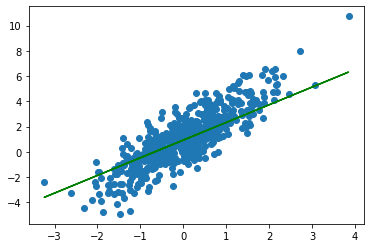

In [6]:
plt.scatter(X, y)
plt.plot(X, y_pred, color='green')

plt.show()

# Model 학습

Loss: 0.8153125963141207


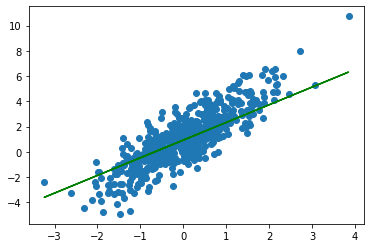

Loss: 0.7309454686873614


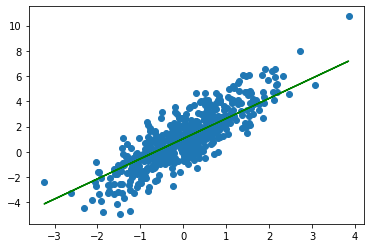

Loss: 0.7014736837080088


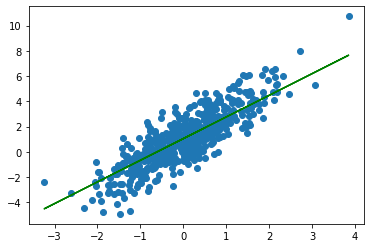

Loss: 0.6902519417732181


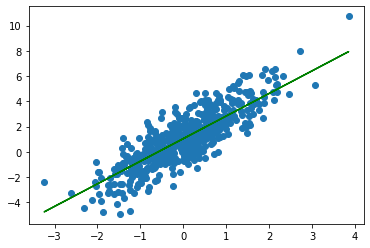

Loss: 0.6859790997116938


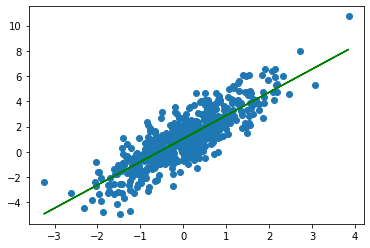

Loss: 0.6843521527192554


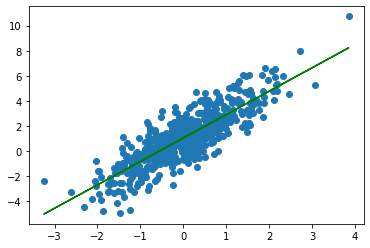

Loss: 0.6837326689007359


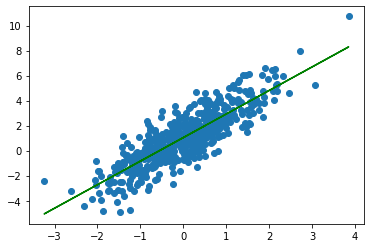

Loss: 0.6834967913932382


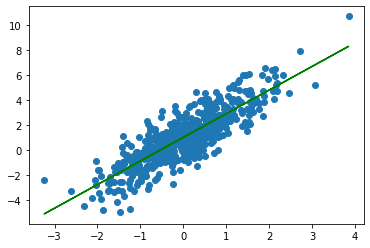

Loss: 0.6834069775887769


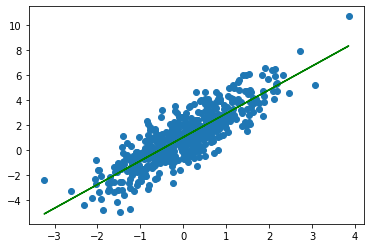

Loss: 0.6833727796715724


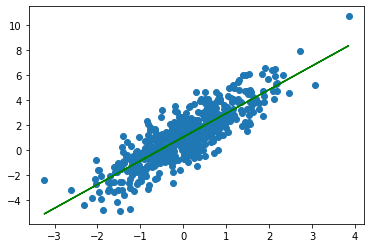

Loss: 0.6833597583153551


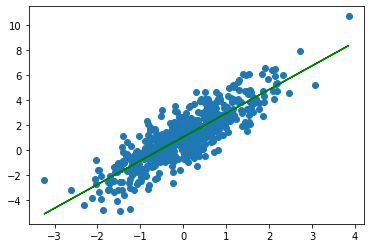

Loss: 0.6833548002438817


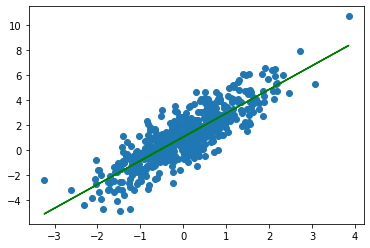

Loss: 0.6833529123857873


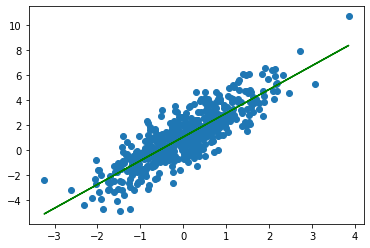

Loss: 0.6833521935562579


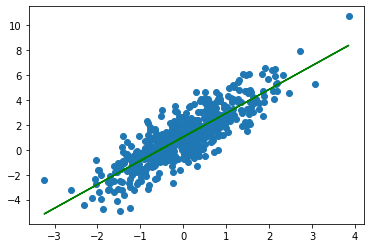

Loss: 0.6833519198514206


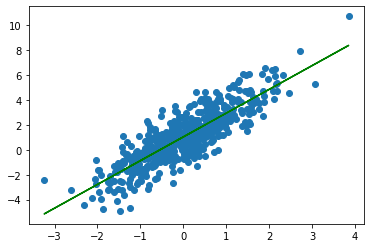

Loss: 0.6833518156343082


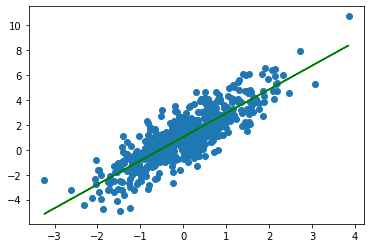

Loss: 0.6833517759521213


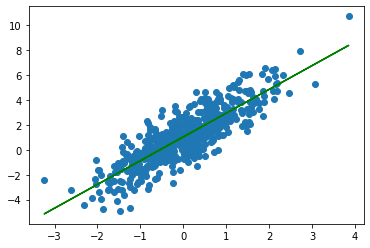

Loss: 0.6833517608425491


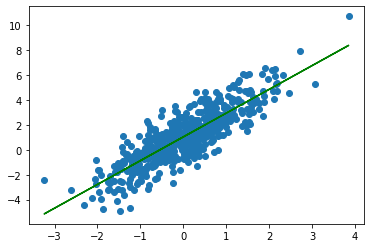

Loss: 0.6833517550893589


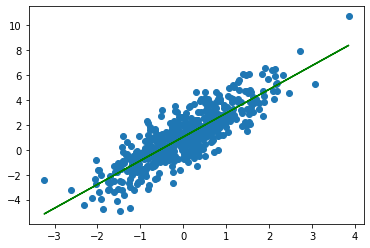

Loss: 0.6833517528987479


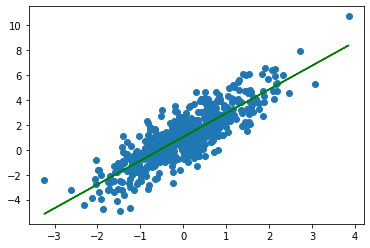

Loss: 0.6833517520646407


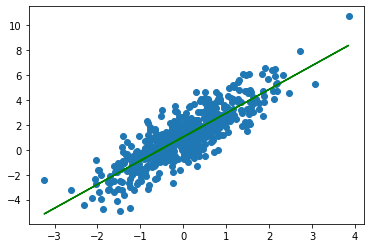

Loss: 0.6833517517470423


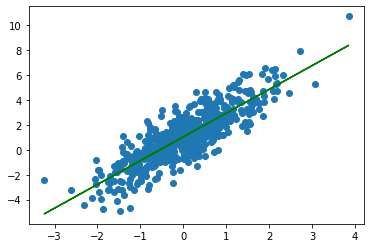

Loss: 0.683351751626112


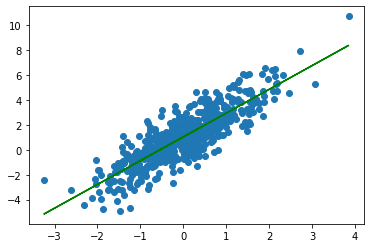

Loss: 0.683351751580066


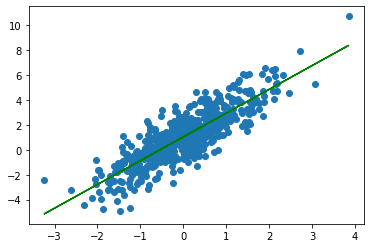

Loss: 0.6833517515625334


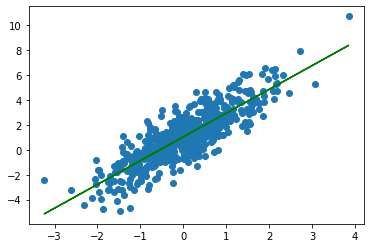

Loss: 0.6833517515558575


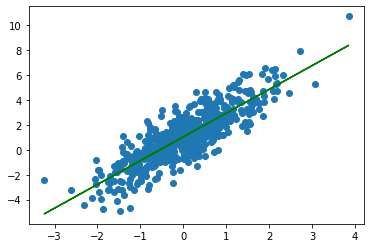

Loss: 0.6833517515533156


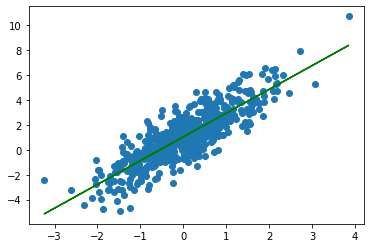

Loss: 0.6833517515523476


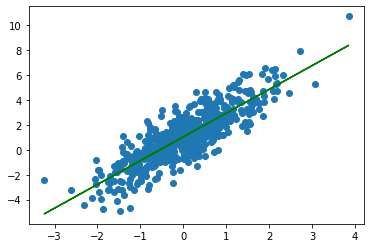

Loss: 0.6833517515519791


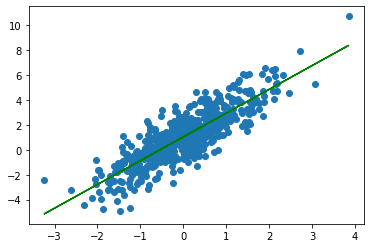

Loss: 0.6833517515518389


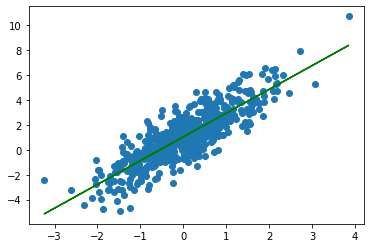

Loss: 0.6833517515517854


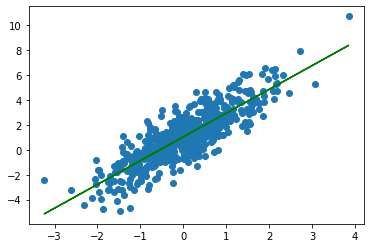

Loss: 0.6833517515517651


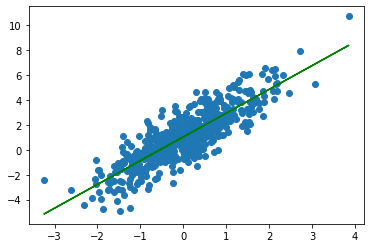

Loss: 0.6833517515517574


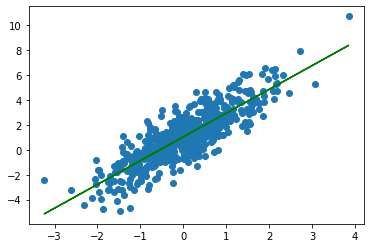

Loss: 0.6833517515517544


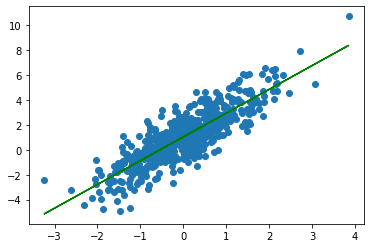

Loss: 0.6833517515517533


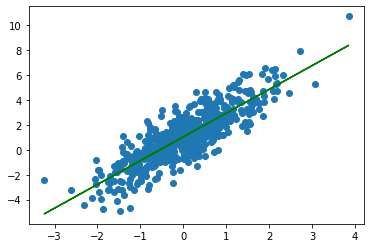

Loss: 0.6833517515517529


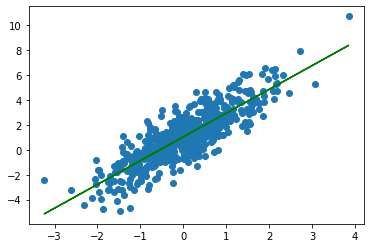

Loss: 0.6833517515517527


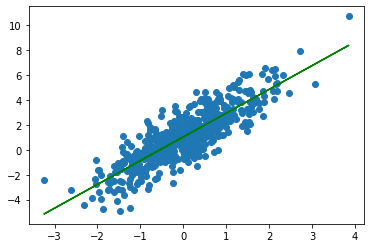

Loss: 0.6833517515517527


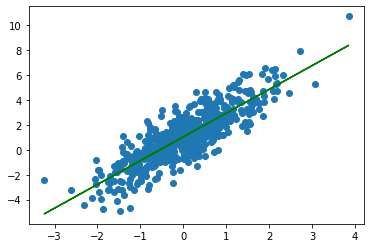

Loss: 0.6833517515517527


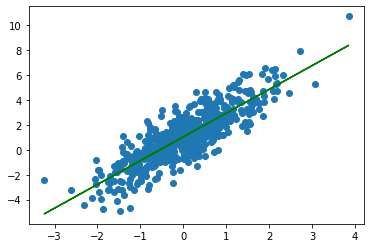

Loss: 0.6833517515517527


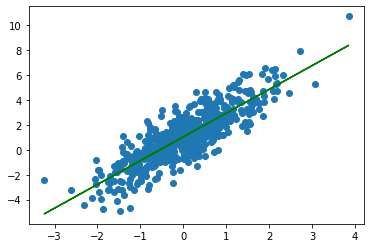

In [7]:
Loss_list = []

for i in range(2000):
  y_pred = theta * X + b
  Loss_list.append(Loss(y, y_pred))

  theta = theta - 0.01 * gradient(X, y, y_pred)
  b = b - 0.1 * gradientb(y, y_pred)

  if i % 50 == 0:
    print(f"Loss: {Loss(y, y_pred)[0]}")

    plt.scatter(X, y)
    plt.plot(X, y_pred, color='green')

    plt.show()

Text(0, 0.5, 'Loss')

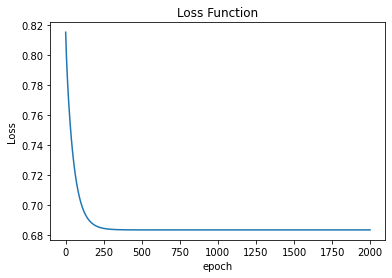

In [8]:
plt.plot(range(2000), Loss_list)
plt.title('Loss Function')
plt.xlabel('epoch')
plt.ylabel('Loss')

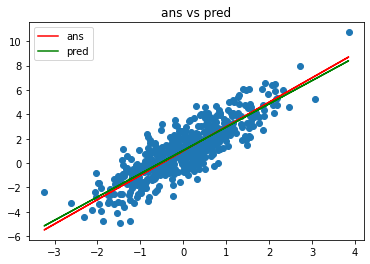

In [9]:
plt.scatter(X, y)
plt.plot(X, 2*X + 1, color = 'red', label = 'ans')
plt.plot(X, y_pred, color = 'green', label = 'pred')
plt.title('ans vs pred')
plt.legend()

# Normal Equation


In [10]:
def find_theta(X, y):
  m = X.shape[0] # Number of training examples. 

  # Appending a cloumn of ones in X to add the **bias term.
  X = np.append(X, np.ones((m,1)), axis=1)    
  
  # reshaping y to (m,1)
  y = y.reshape(m,1)
    
  # The Normal Equation
  theta = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
  return theta

In [11]:
def predict(X):
  # Appending a cloumn of ones in X to add the bias term.
  X = np.append(X, np.ones((X.shape[0],1)), axis=1)
    
  # preds is y_hat which is the dot product of X and theta.
  preds = np.dot(X, theta)  
  return preds

In [12]:
theta = find_theta(X, y)

In [13]:
print(f"x1: {theta[0][0]}, bias: {theta[1][0]}")

x1: 1.9094964152939362, bias: 1.0388102034896778


Text(0, 0.5, 'y - target / true')

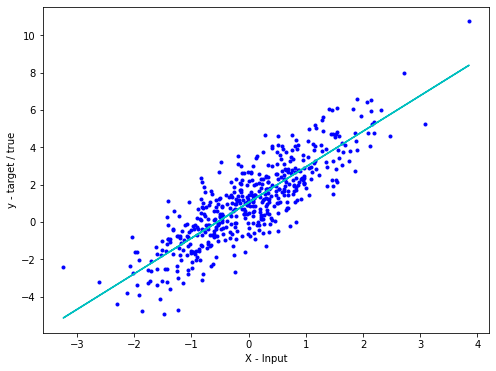

In [14]:
preds = predict(X)

fig = plt.figure(figsize=(8,6))
plt.plot(X, y, 'b.')
plt.plot(X, preds, 'c-')
plt.xlabel('X - Input')
plt.ylabel('y - target / true')

# Using Library

In [43]:
from sklearn import linear_model

In [61]:
reg = linear_model.LinearRegression()

In [62]:
# data 생성
np.random.seed(42)
X = np.random.randn(500,1)
y = 2*X + 1 + 1.2*np.random.randn(500,1)

In [65]:
reg.fit(X, y)

LinearRegression()

In [68]:
print(f"x1 coeff: {reg.coef_}, bias coeff: {reg.intercept_}")

x1 coeff: [[1.90949642]], bias coeff: [1.0388102]


In [70]:
print(f"R2 Score: {reg.score(X, y)}")

R2 Score: 0.7193876246584269


$R^2 = (1 - \frac{SSE}{SST})$
- $SSE = ((y_true - y_pred)** 2).sum()$, 즉, **MSE**
- $SST = ((y_true - y_true.mean()) ** 2).sum()$, 즉, **Var(y)**